In [1]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])
import keras
import tensorflow as tf
config = tf.ConfigProto(device_count={"CPU": 4})
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

base


Using TensorFlow backend.


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model, load_model
from keras.layers import Dense, Activation, Dropout, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [3]:
with open("./data-pickle/X_train.pkl","rb") as f:
    X_train = pickle.load(f)

In [4]:
with open("./data-pickle/X_test.pkl","rb") as f:
    X_test = pickle.load(f)

In [5]:
with open("./data-pickle/y_train.pkl","rb") as f:
    y_train = pickle.load(f)

In [6]:
with open("./data-pickle/y_test.pkl","rb") as f:
    y_test = pickle.load(f)

In [7]:
X_train = X_train.reshape(-1,431,20,1)
X_test = X_test.reshape(-1,431,20,1)

In [8]:
X_train.shape

(12770, 431, 20, 1)

In [9]:
X_test.shape

(3193, 431, 20, 1)

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 12)
y_test = to_categorical(y_test, 12)

Model

In [11]:
X_input = Input(shape = (431,20,1))
    
# Step 1: CONV layer
X = Conv2D(98, kernel_size=(30,5), strides=(10,1))(X_input)   # CONV2D
X = BatchNormalization()(X)                                   # Batch normalization
X = Activation('relu')(X)                                     # ReLu activation
X = Dropout(0.2)(X)                                           # dropout (use 0.2)

# Step 2: CONV layer
X = Conv2D(98, kernel_size=(5,3), strides=(2,1))(X)           # CONV2D
X = BatchNormalization()(X)                                   # Batch normalization
X = Activation('relu')(X)                                     # ReLu activation
X = Dropout(0.2)(X)                                           # dropout (use 0.2)

# Step 3: CONV layer
X = Conv2D(48, kernel_size=(3,3), strides=(1,1))(X)           # CONV2D
X = BatchNormalization()(X)                                   # Batch normalization
X = Activation('relu')(X)                                     # ReLu activation
X = Dropout(0.2)(X)                                           # dropout (use 0.2)

X = Flatten()(X)
X = Dense(12, activation = "sigmoid")(X)
model = Model(inputs = X_input, outputs = X) 

In [12]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)

model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 431, 20, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 41, 16, 98)        14798     
_________________________________________________________________
batch_normalization_1 (Batch (None, 41, 16, 98)        392       
_________________________________________________________________
activation_1 (Activation)    (None, 41, 16, 98)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 16, 98)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 14, 98)        144158    
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 14, 98)        392       
__________

In [13]:
plot_model(model, to_file='3-cnn-model-architecture-6.png')

<center><img src="3-cnn-model-architecture-6.png" height="50"></center>

In [14]:
r = model.fit(
  X_train,
  y_train,
  validation_data=(X_test, y_test),
  batch_size=128,
  epochs=5
)

Train on 12770 samples, validate on 3193 samples
Epoch 1/5
12770/12770 [==============================] - 118s 9ms/step - loss: 0.7799 - acc: 0.7062 - val_loss: 0.7042 - val_acc: 0.7714
Epoch 3/5
12770/12770 [==============================] - 118s 9ms/step - loss: 0.6446 - acc: 0.7628 - val_loss: 0.5989 - val_acc: 0.8099
Epoch 4/5
12770/12770 [==============================] - 118s 9ms/step - loss: 0.5691 - acc: 0.7971 - val_loss: 0.5358 - val_acc: 0.8249
Epoch 5/5
12770/12770 [==============================] - 118s 9ms/step - loss: 0.5260 - acc: 0.8154 - val_loss: 0.5143 - val_acc: 0.8227


In [15]:
y_pred = model.predict(X_test)

In [16]:
with open("./data-pickle/result_y_pred.pkl","wb") as f:
    pickle.dump(y_pred,f)

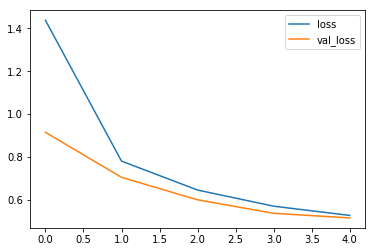

In [17]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

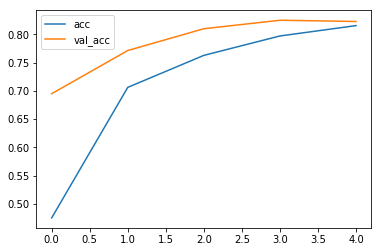

In [18]:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

## Save model

In [19]:
from keras.models import load_model

model.save('data-pickle/model_3_cnn.h5')

## Load model

In [20]:
from keras.models import load_model
model = load_model('./data-pickle/model_3_cnn.h5')